##Hand Gesture Recognition Database using Near-Infrared Images from Leap Motion Sensor
Introduction
In this project, we present a comprehensive hand gesture recognition database that utilizes near-infrared images acquired by the state-of-the-art Leap Motion sensor. Hand gesture recognition has garnered significant interest due to its wide range of applications, including human-computer interaction, sign language recognition, and virtual reality control systems. The database is designed to facilitate research and development in the field of computer vision and machine learning for gesture recognition.

####Database Description
Our hand gesture recognition database consists of a diverse set of 10 distinct hand-gestures performed by 10 different subjects, comprising an equal number of men and women. The use of near-infrared images ensures robustness to varying lighting conditions and helps capture finer details of hand movements. Each gesture was recorded under controlled conditions to ensure high-quality data.

####Gestures and Subjects
The 10 different subjects who performed these gestures were carefully chosen to represent a diverse cross-section of the population, ensuring a balanced and representative dataset.

####Data Collection
For data collection, the Leap Motion dataset has been collected from kaggle.

####Data Specifications
The images in the database are provided in a standardized format and have been preprocessed to remove noise and unwanted artifacts. The resolution of the images is 640x480 pixels, ensuring a suitable balance between quality and computational efficiency for various machine learning algorithms.

####Conclusion
Our hand gesture recognition database serves as a valuable resource for advancing the field of gesture recognition and developing innovative human-computer interaction systems. The use of near-infrared images acquired from the Leap Motion sensor enhances the reliability and accuracy of the dataset, making it suitable for a wide range of applications. We hope that this database will foster further research and lead to the development of sophisticated gesture recognition systems with real-world applicability.






In [6]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow
import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [7]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = "../input/leapgestrecog/leapGestRecog"

## The Data

In [8]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[4, 5, 7, ..., 4, 3, 4],
        [6, 6, 6, ..., 4, 4, 3],
        [5, 6, 6, ..., 5, 4, 4],
        ...,
        [6, 6, 6, ..., 5, 6, 4],
        [6, 5, 5, ..., 5, 6, 4],
        [4, 6, 6, ..., 5, 4, 5]], dtype=uint8),
 0]

In [9]:
# shuffle the input data
import random
random.shuffle(image_data)

In [10]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [11]:
label[:10]

[5, 6, 5, 3, 4, 2, 5, 3, 2, 2]

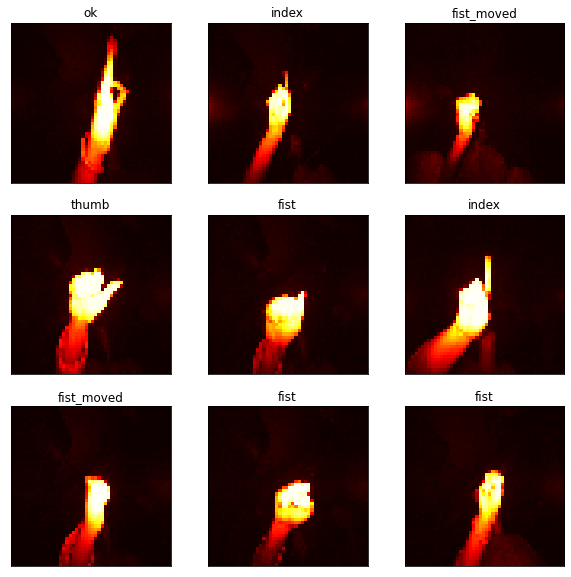

In [12]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [13]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [14]:
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int8)

In [15]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [16]:
# splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

## The Model

In [17]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [18]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Train on 14000 samples, validate on 6000 samples
Epoch 1/7
14000/14000 [==============================] - 6s 429us/step - loss: 0.3282 - accuracy: 0.8943 - val_loss: 0.0478 - val_accuracy: 0.9775
Epoch 2/7
14000/14000 [==============================] - 3s 223us/step - loss: 0.0197 - accuracy: 0.9944 - val_loss: 0.0037 - val_accuracy: 0.9992
Epoch 3/7
14000/14000 [==============================] - 3s 222us/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.0835 - val_accuracy: 0.9843
Epoch 4/7
14000/14000 [==============================] - 3s 219us/step - loss: 0.0058 - accuracy: 0.9986 - val_loss: 0.0055 - val_accuracy: 0.9993
Epoch 5/7
14000/14000 [==============================] - 3s 219us/step - loss: 0.0060 - accuracy: 0.9984 - val_loss: 0.0077 - val_accuracy: 0.9995
Epoch 6/7
14000/14000 [==============================] - 3s 227us/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.0075 - val_accuracy: 0.9993
Epoch 7/7
14000/14000 [==============================] - 3s 219us/ste

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)       

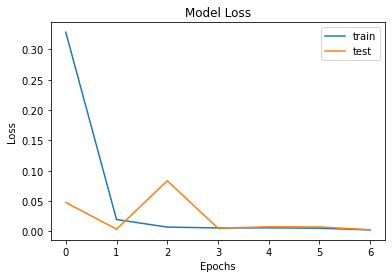

In [20]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

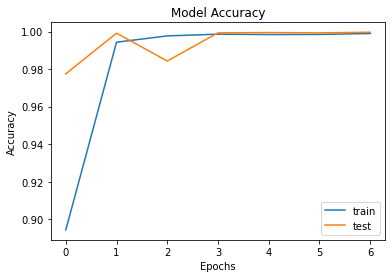

In [21]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [22]:
#calculate loss and accuracy on test data

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

6000/6000 [==============================] - 1s 90us/step
Test accuracy: 99.97%


## Confusion Matrix

[]

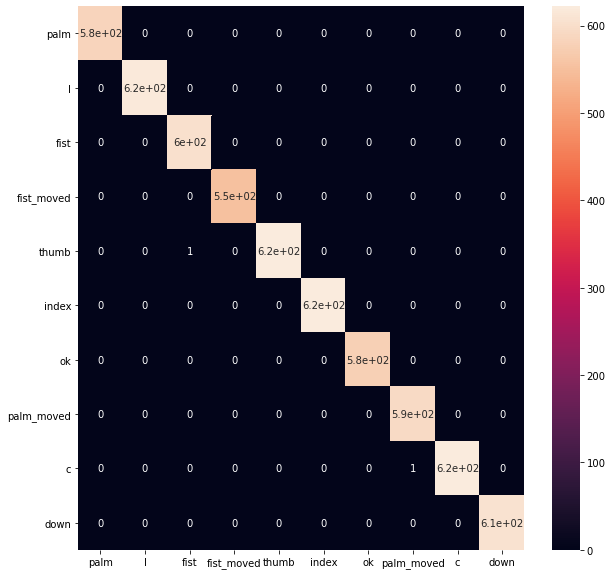

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()